In [1]:
import numpy as np
import pandas as pd
import ptitprince as pt
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# import data

In [2]:
raw_t0 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T0')
raw_t1 = pd.read_excel('C:/Users/u0117545/Documents/GitHub/ULIFT_BC/Output/MoveQual_aff.xlsx', sheet_name = 'T1')


In [3]:
# find participants that have T0 and T1 data 

pp_t0 = raw_t0.iloc[:, 0:3].drop('trial', axis = 1)
pp_t1 = raw_t1.iloc[:, 0:3].drop('trial', axis = 1)
pp_list = pd.merge(pp_t0, pp_t1, on='ppID')
pp_list = pp_list.drop(['time_x', 'time_y'], axis = 1)
print(pp_list)

#i = pp_list.loc[pp_list['ppID'] == 'BC_013'].index
#pp_list = pp_list.drop(i)

      ppID
0   BC_001
1   BC_002
2   BC_003
3   BC_005
4   BC_006
5   BC_007
6   BC_008
7   BC_009
8   BC_010
9   BC_011
10  BC_012
11  BC_013
12  BC_014
13  BC_015
14  BC_016
15  BC_017
16  BC_018
17  BC_019
18  BC_020
19  BC_021
20  BC_023
21  BC_026
22  BC_027
23  BC_029
24  BC_030
25  BC_036
26  BC_039
27  BC_041
28  BC_046
29  BC_048


### create datafram with index

In general, there appears to be no differences in movement quality before an after surgery on group level

# Run the analysis again. But remove the participants that had perceived disability pre-operatively

N = 17 op dit moment

In [4]:
raw_dash = pd.read_csv("C:\\Users\\u0117545\\KU Leuven\\An De Groef - DATA\\XsensTest\\QuickDASH\\UPLIFTBC-QuickDASH_DATA_2022-10-31_1406 (1).csv",
                   sep=';')

In [5]:
# only retain T0 of the dash scores 
idx = raw_dash['redcap_event_name'].str.contains('t0')
mask = np.where(idx)[0]
raw_dash = raw_dash.iloc[mask]
raw_dash.head()

,record_id,redcap_event_name,quickdash_1,quickdash_2,quickdash_3,quickdash_4,quickdash_5,quickdash_6,quickdash_7,quickdash_8,quickdash_9,quickdash_10,quickdash_11
0,BC_001,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,BC_002,t0_baseline_presur_arm_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,BC_003,t0_baseline_presur_arm_1,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
7,BC_004,t0_baseline_presur_arm_1,4.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0
8,BC_005,t0_baseline_presur_arm_1,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0


In [6]:
# remove participants with more than 2 NaNs
# Remove rows with missing values
print("Before removing rows with missing data: {} rows".format(len(raw_dash)))
df_dash = raw_dash.dropna(thresh=raw_dash.shape[1]-1, axis=0)
print("After removing rows with missing data: {} rows".format(len(df_dash)))

som = df_dash.iloc[:,2:].sum(axis='columns')
col_n_counts = np.sum(df_dash.applymap(lambda x: 0 if pd.isnull(x) else 1), axis=1)-2
complete = col_n_counts.apply(lambda x:  x >= 10 )

total_score = ((som/col_n_counts)-1) * 25

print('Average score over all participants and timepoints = {}'.format(np.mean(total_score)))
print('Maximum and minumum scores are {} & {} respectively'.format(total_score.max(), total_score.min()))

Before removing rows with missing data: 33 rows
After removing rows with missing data: 28 rows
Average score over all participants and timepoints = 10.722402597402596
Maximum and minumum scores are 56.81818181818182 & 0.0 respectively


In [7]:
#set-up dataframe for total dash scores. 
d = {'ppID': df_dash['record_id'],
    'total_score': total_score}
df_totaldash = pd.DataFrame(data=d)

In [8]:
# find the people with a dash score higher than 15
idx = df_totaldash['total_score'] < 15
mask = np.where(idx)[0]
prePain = df_totaldash.iloc[mask]
prePain = prePain.drop('total_score', axis =1 )

In [9]:
pp_list_noPain = pd.merge(prePain, pp_list, on='ppID')
print(pp_list_noPain)
print(len(pp_list_noPain))

      ppID
0   BC_001
1   BC_002
2   BC_003
3   BC_006
4   BC_009
5   BC_010
6   BC_011
7   BC_013
8   BC_014
9   BC_015
10  BC_016
11  BC_017
12  BC_018
13  BC_019
14  BC_023
15  BC_026
16  BC_029
17


In [10]:
len(raw_t0)

34

In [11]:
t0_noPain = pd.merge(raw_t0, pp_list_noPain, on='ppID')
t1_noPain = pd.merge(raw_t1, pp_list_noPain, on='ppID')

assert len(t0_noPain) == len(t1_noPain) == len(pp_list_noPain)

raw_noPain = pd.concat([t0_noPain, t1_noPain], axis=0, ignore_index=True)
raw_noPain.head()

,ppID,trial,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,...,reg_z,reg_res,rms_x,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A
0,BC_001,F_R_001,T0,3.950177,1.560012,2.122065,4.786423,0.513646,1.127117,0.445992,...,0.708531,0.692586,2.749810,0.719590,3.706553,4.927259,0.588704,0.154056,0.793533,-6.539093
1,BC_002,F_L_001,T0,3.788004,2.315057,4.233059,2.088633,0.655765,0.850075,0.584630,...,0.842953,0.614618,1.732328,1.330343,2.342847,3.373657,0.540832,0.415333,0.731436,-6.903967
2,BC_003,F_R_001,T0,2.632648,1.721626,1.807546,3.848663,0.374191,1.025253,0.409270,...,0.715498,0.725298,4.268186,0.995634,5.857150,7.615111,0.583453,0.136101,0.800662,-6.356684
3,BC_006,F_R_001,T0,2.582943,1.988339,2.054300,5.563100,0.876065,1.178846,0.464616,...,0.422465,0.359772,1.935272,1.170191,3.431986,4.372106,0.470854,0.284709,0.835007,-7.460332
4,BC_009,F_L_001,T0,2.931908,1.897868,3.067054,1.903209,0.755026,0.739114,0.544976,...,0.841145,0.606908,1.866275,1.975754,3.427196,4.613811,0.426670,0.451700,0.783530,-6.401688


In [12]:
df_noPain = raw_noPain.iloc[0:,1:]
df_noPain.index = raw_noPain.iloc[0:,0]
len(df_noPain)

34

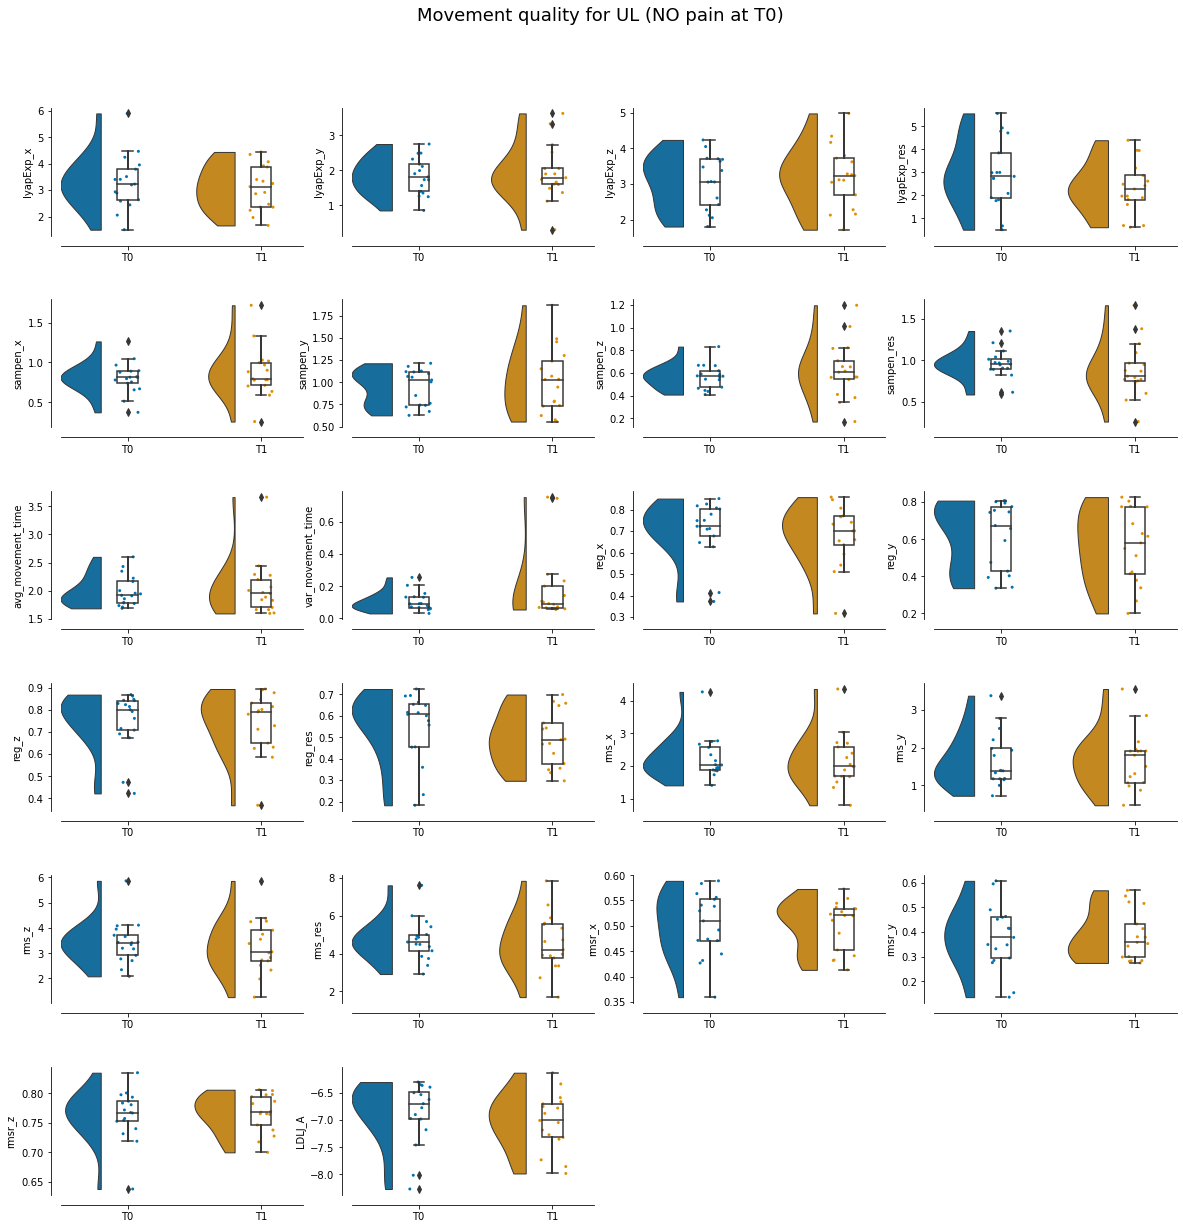

In [13]:
X = df_noPain.drop(['trial','time'], axis = 1)
# find minimium required rows given we want 5 columns
ncols = 4
nrows = len(X.columns) // ncols + (len(X.columns) % ncols > 0)
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

f = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Movement quality for UL (NO pain at T0)", fontsize=18, y=0.95)

f.tight_layout();
offset = 0.1;

for n, columns in enumerate(X.columns):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
    
    # filter df and plot ticker on the new subplot axis
    #df[df["ticker"] == ticker].plot(ax=ax)
     
    pt.RainCloud(x = dx, y = columns, data = df_noPain, ax = ax,
                palette = pal, bw = sigma, width_viol = viol,
                orient = ort, move = mv)
    sns.despine(offset=10)
    ax.set_xlabel('')
    
plt.savefig('MovementQuality_noPain.tiff')

In [14]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']

for var in df_noPain.columns:
    print('Analyzing {}'.format(var))
    if var == 'trial' or var == 'time':
        print(80* "_" + "\n" )
    else:
        t_statistic, pvalue = stats.wilcoxon(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )

Analyzing trial
________________________________________________________________________________

Analyzing time
________________________________________________________________________________

Analyzing lyapExp_x
73.0 0.89
________________________________________________________________________________

Analyzing lyapExp_y
67.0 0.6777
________________________________________________________________________________

Analyzing lyapExp_z
63.0 0.5477
________________________________________________________________________________

Analyzing lyapExp_res
40.0 0.0887
________________________________________________________________________________

Analyzing sampen_x
52.0 0.2633
________________________________________________________________________________

Analyzing sampen_y
55.0 0.3289
________________________________________________________________________________

Analyzing sampen_z
59.0 0.4307
________________________________________________________________________________

Analyzing 

In general, even when removing the participant with self reported disability, there are no apparent differences between baseline and follow-up. 


In [15]:
for var in df_noPain.columns:   
    if 'res' in var or var == 'LDLJ_A' :
        print('Analyzing {}'.format(var))
        t_statistic, pvalue = stats.wilcoxon(T0[var], T1[var])
        print(t_statistic, round(pvalue, ndigits=4))
        
        print(80* "_" + "\n" )
    
  

Analyzing lyapExp_res
40.0 0.0887
________________________________________________________________________________

Analyzing sampen_res
30.0 0.0267
________________________________________________________________________________

Analyzing reg_res
55.0 0.3289
________________________________________________________________________________

Analyzing rms_res
60.0 0.4586
________________________________________________________________________________

Analyzing LDLJ_A
50.0 0.2247
________________________________________________________________________________



Sample Entropy of the residual and the LDLJ_A combinaties. 
Test them! 



In [16]:
# product
df_noPain['product'] = df_noPain['LDLJ_A'] * df_noPain['sampen_res']

<AxesSubplot:xlabel='time', ylabel='product'>

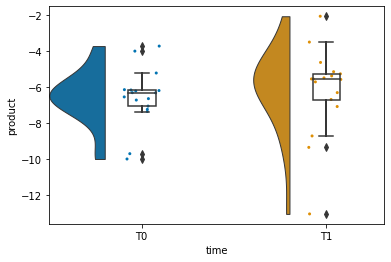

In [17]:
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

pt.RainCloud(x = dx, y = 'product', data = df_noPain,
             palette = pal, bw = sigma, width_viol = viol,
             orient = ort, move = mv)

In [18]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']


t_statistic, pvalue = stats.wilcoxon(T0['product'], T1['product'])
print(t_statistic, round(pvalue, ndigits=4))


28.0 0.0202


In [19]:
#ratio
df_noPain['ratioLS'] = df_noPain['LDLJ_A'] / df_noPain['sampen_res']

<AxesSubplot:xlabel='time', ylabel='ratioLS'>

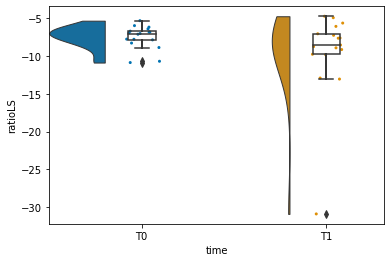

In [20]:
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

pt.RainCloud(x = dx, y = 'ratioLS', data = df_noPain,
             palette = pal, bw = sigma, width_viol = viol,
             orient = ort, move = mv)

In [21]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']


t_statistic, pvalue = stats.wilcoxon(T0['ratioLS'], T1['ratioLS'])
print(t_statistic, round(pvalue, ndigits=4))


31.0 0.0305


<AxesSubplot:xlabel='time', ylabel='prodLL'>

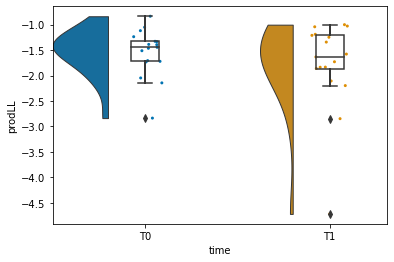

In [22]:
df_noPain['prodLL'] = df_noPain['LDLJ_A'] / df_noPain['rms_res']
dx = "time"; ort = "v"; pal = 'colorblind'; sigma = .6; viol = .6; mv = .0

pt.RainCloud(x = dx, y = 'prodLL', data = df_noPain,
             palette = pal, bw = sigma, width_viol = viol,
             orient = ort, move = mv)

In [23]:
T0 = df_noPain.loc[df_noPain['time']=='T0']
T1 = df_noPain.loc[df_noPain['time']=='T1']
timepoints = ['T0', 'T1']


t_statistic, pvalue = stats.wilcoxon(T0['prodLL'], T1['prodLL'])
print(t_statistic, round(pvalue, ndigits=4))


58.0 0.4038


In [24]:
X = df_noPain.drop(['trial'], axis = 1).reset_index()
X.head()

,ppID,time,lyapExp_x,lyapExp_y,lyapExp_z,lyapExp_res,sampen_x,sampen_y,sampen_z,sampen_res,...,rms_y,rms_z,rms_res,rmsr_x,rmsr_y,rmsr_z,LDLJ_A,product,ratioLS,prodLL
0,BC_001,T0,3.950177,1.560012,2.122065,4.786423,0.513646,1.127117,0.445992,0.611806,...,0.719590,3.706553,4.927259,0.588704,0.154056,0.793533,-6.539093,-4.000657,-10.688179,-1.327126
1,BC_002,T0,3.788004,2.315057,4.233059,2.088633,0.655765,0.850075,0.584630,0.890218,...,1.330343,2.342847,3.373657,0.540832,0.415333,0.731436,-6.903967,-6.146036,-7.755365,-2.046434
2,BC_003,T0,2.632648,1.721626,1.807546,3.848663,0.374191,1.025253,0.409270,0.585365,...,0.995634,5.857150,7.615111,0.583453,0.136101,0.800662,-6.356684,-3.720983,-10.859345,-0.834746
3,BC_006,T0,2.582943,1.988339,2.054300,5.563100,0.876065,1.178846,0.464616,0.901426,...,1.170191,3.431986,4.372106,0.470854,0.284709,0.835007,-7.460332,-6.724940,-8.276141,-1.706347
4,BC_009,T0,2.931908,1.897868,3.067054,1.903209,0.755026,0.739114,0.544976,1.038235,...,1.975754,3.427196,4.613811,0.426670,0.451700,0.783530,-6.401688,-6.646456,-6.165934,-1.387505


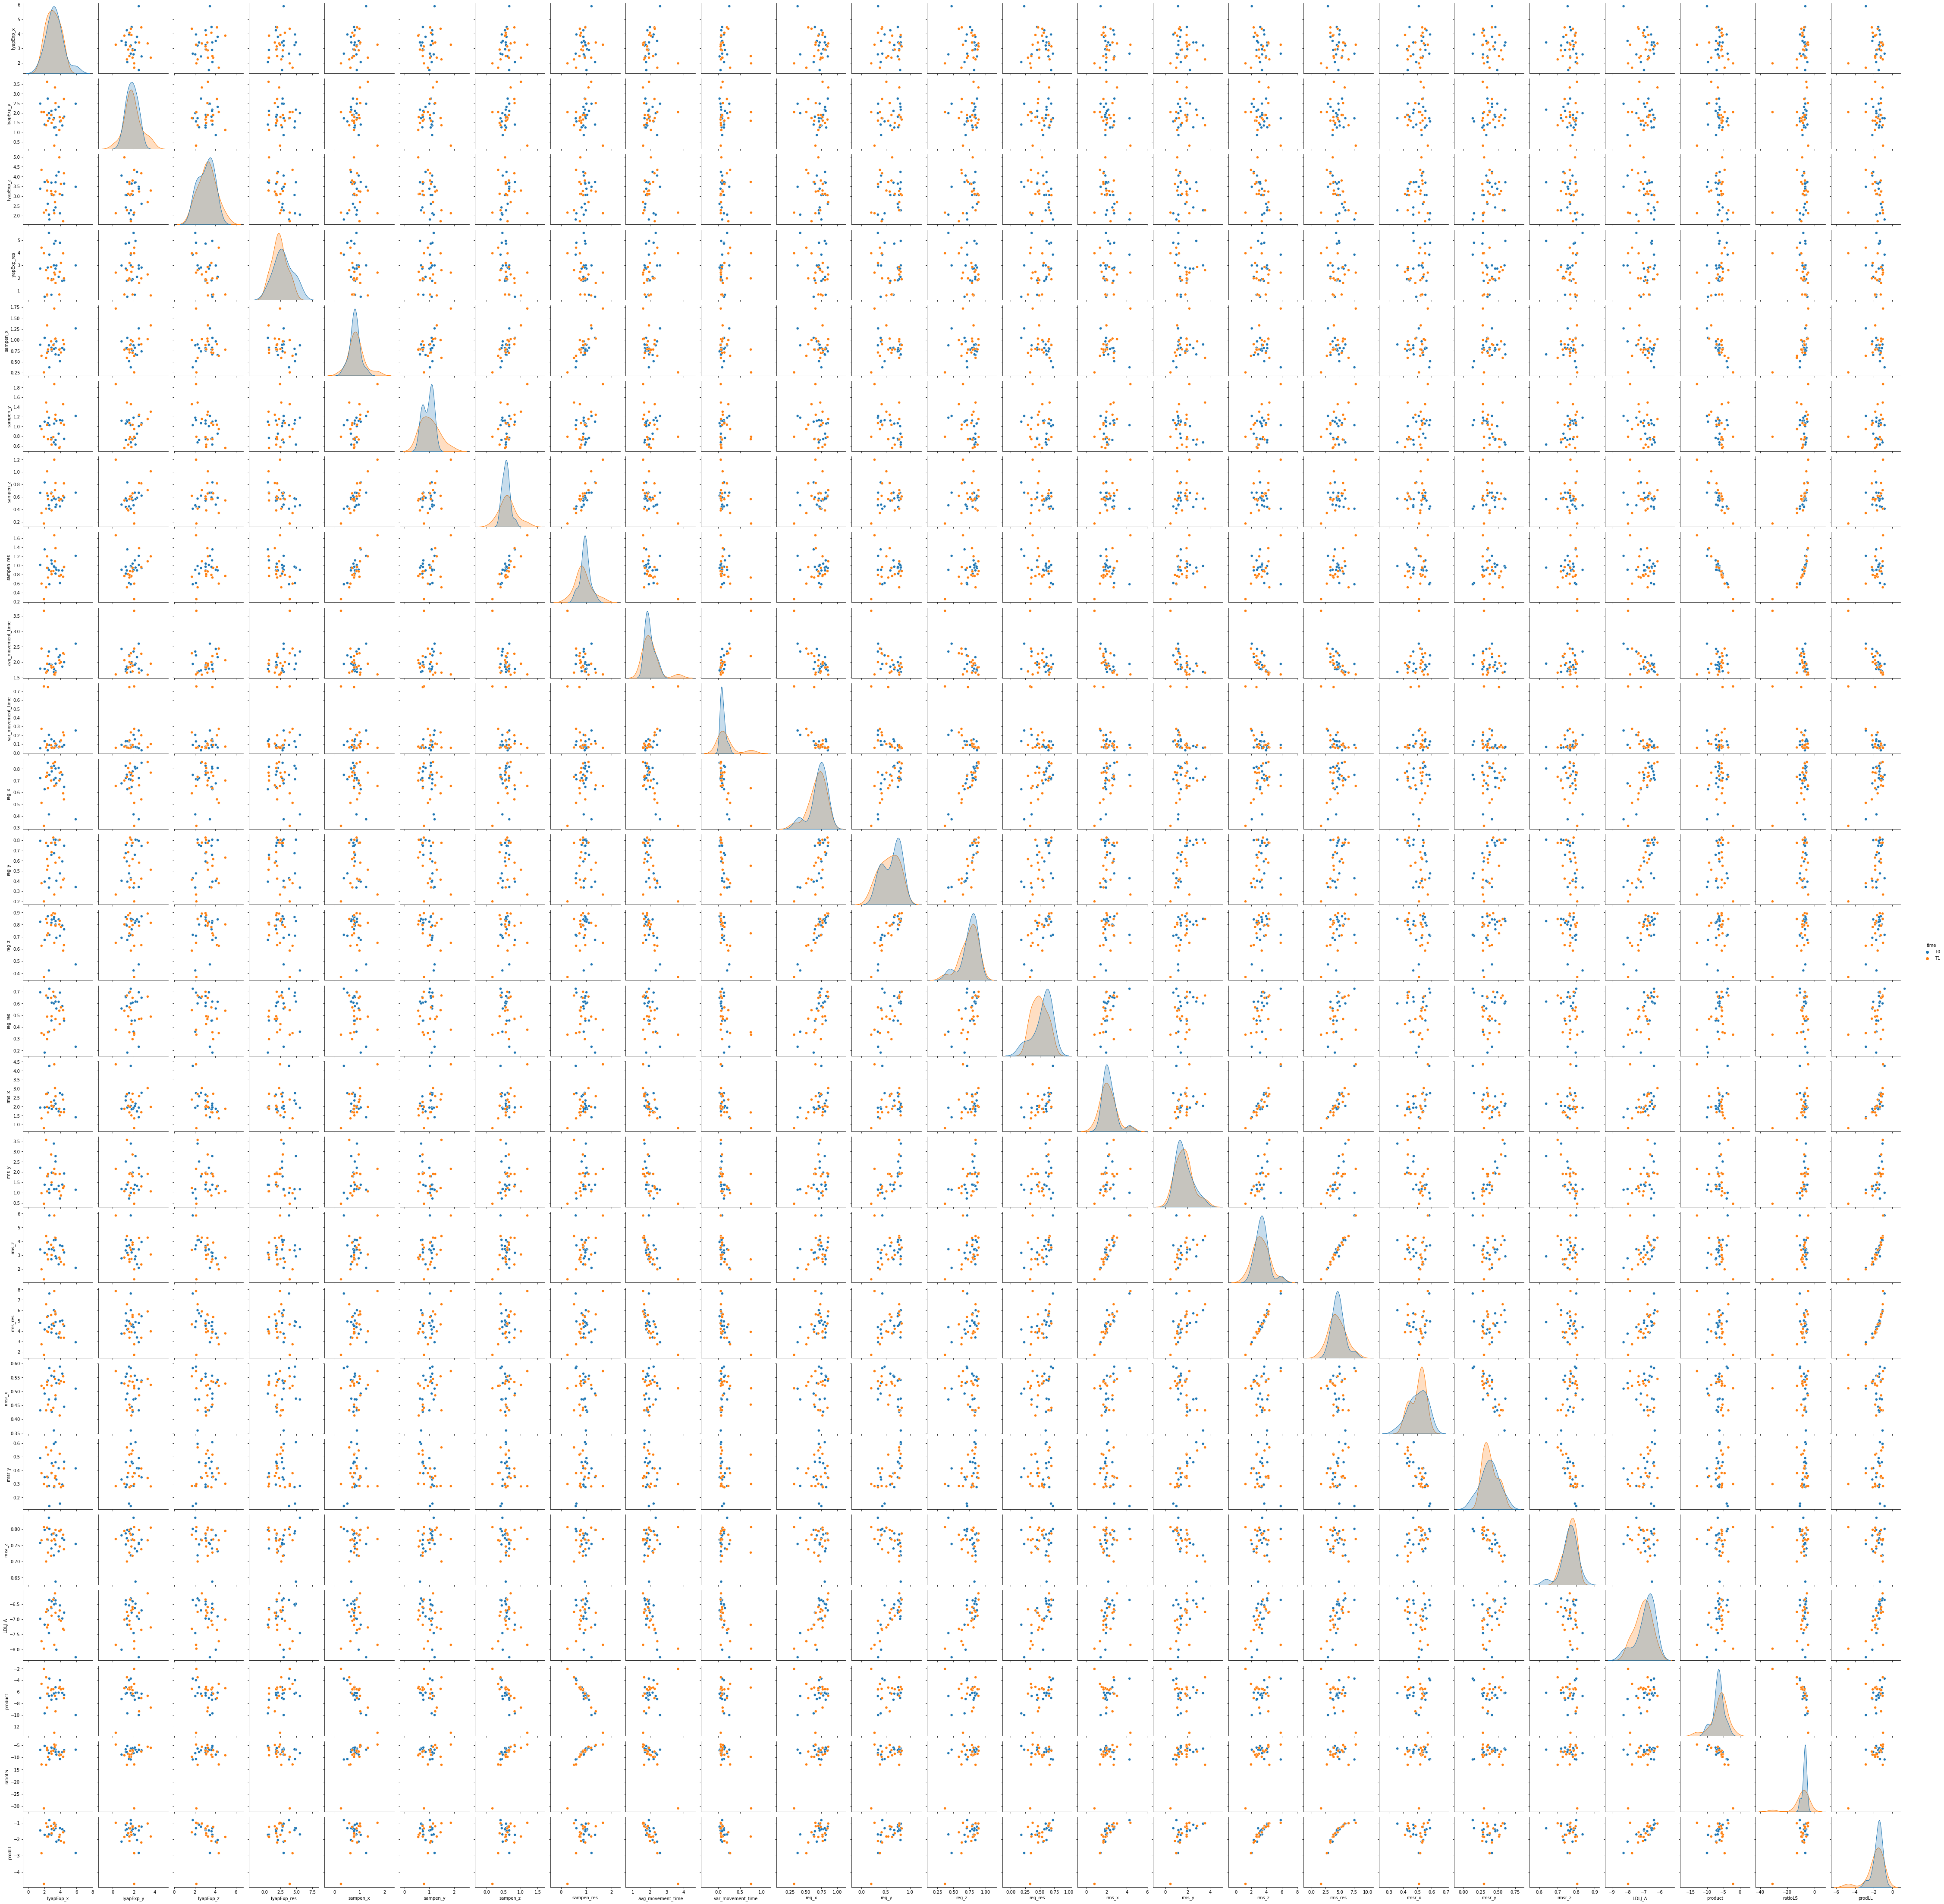

In [25]:
sns.pairplot(X, hue='time')